In [1]:
import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras import models, layers, optimizers

In [2]:
#tomamos las 10000 palabras mas comunes
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words= 10000)

<__array_function__ internals>:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/home/santi/anaconda3/envs/neuronal_networks_examples/lib/python3.9/site-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/home/santi/anaconda3/envs/neuronal_networks_examples/lib/python3.9/site-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-o

In [3]:
#obtenemos las palabras y los numeros que representan
words = imdb.get_word_index()
words

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [4]:
#creamos un diccionario con la el numero como llave y la palabra como el valor
words_dict = dict([(value, key) for (key, value ) in words.items()])
words_dict

{34701: 'fawn',
 52006: 'tsukino',
 52007: 'nunnery',
 16816: 'sonja',
 63951: 'vani',
 1408: 'woods',
 16115: 'spiders',
 2345: 'hanging',
 2289: 'woody',
 52008: 'trawling',
 52009: "hold's",
 11307: 'comically',
 40830: 'localized',
 30568: 'disobeying',
 52010: "'royale",
 40831: "harpo's",
 52011: 'canet',
 19313: 'aileen',
 52012: 'acurately',
 52013: "diplomat's",
 25242: 'rickman',
 6746: 'arranged',
 52014: 'rumbustious',
 52015: 'familiarness',
 52016: "spider'",
 68804: 'hahahah',
 52017: "wood'",
 40833: 'transvestism',
 34702: "hangin'",
 2338: 'bringing',
 40834: 'seamier',
 34703: 'wooded',
 52018: 'bravora',
 16817: 'grueling',
 1636: 'wooden',
 16818: 'wednesday',
 52019: "'prix",
 34704: 'altagracia',
 52020: 'circuitry',
 11585: 'crotch',
 57766: 'busybody',
 52021: "tart'n'tangy",
 14129: 'burgade',
 52023: 'thrace',
 11038: "tom's",
 52025: 'snuggles',
 29114: 'francesco',
 52027: 'complainers',
 52125: 'templarios',
 40835: '272',
 52028: '273',
 52130: 'zaniacs',

In [5]:
def translater(data):
  text = ""
  for _ in data:
    text = text + str(words_dict.get(_ - 3)) + " "
  return text

In [6]:
print(translater(train_data[0]))

None this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert None is an amazing actor and now the same being director None father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for None and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also None to the two little boy's that played the None of norman and paul they were just brilliant children are often left out of the None list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they ha

In [7]:

def vectorizar(sequences, dim=10000):
  results = np.zeros((len(sequences), dim))
  for index, sequences in enumerate(sequences):
    results[index,sequences]=1
  return results

In [8]:
x_train = vectorizar(train_data)
x_test = vectorizar(test_data)
print(x_test.shape)
print(x_test[0])

(25000, 10000)
[0. 1. 1. ... 0. 0. 0.]


In [69]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [9]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

print(y_train.shape)
print(y_train)

(25000,)
[1. 0. 0. ... 0. 1. 0.]


### Crear el modelo

In [10]:
model = models.Sequential()
#  layers.dence para problemas binarios como este
model.add(layers.Dense(16, activation="relu", input_shape = (10000,)))
model.add(layers.Dense(16, activation="relu" ))
model.add(layers.Dense(1, activation="sigmoid"))

2022-08-11 11:03:31.976473: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-08-11 11:03:32.687774: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-08-11 11:03:34.737894: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [11]:
model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics="accuracy")

In [12]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:] 

y_val = y_train[:10000]
partial_y_train = y_train[10000:] 

In [13]:
history = model.fit(partial_x_train,  #datos de aprendizaje
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val,y_val) #datos de validación del model
                   )

2022-08-11 11:04:16.654833: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-08-11 11:04:17.974430: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2995200000 Hz


Epoch 1/20
30/30 [==============================] - 18s 182ms/step - loss: 0.6076 - accuracy: 0.6881 - val_loss: 0.4081 - val_accuracy: 0.8584
Epoch 2/20
30/30 [==============================] - 2s 60ms/step - loss: 0.3401 - accuracy: 0.9003 - val_loss: 0.3352 - val_accuracy: 0.8711
Epoch 3/20
30/30 [==============================] - 2s 57ms/step - loss: 0.2462 - accuracy: 0.9271 - val_loss: 0.2811 - val_accuracy: 0.8908
Epoch 4/20
30/30 [==============================] - 2s 50ms/step - loss: 0.1834 - accuracy: 0.9452 - val_loss: 0.2786 - val_accuracy: 0.8883
Epoch 5/20
30/30 [==============================] - 1s 43ms/step - loss: 0.1537 - accuracy: 0.9549 - val_loss: 0.2742 - val_accuracy: 0.8881
Epoch 6/20
30/30 [==============================] - 2s 52ms/step - loss: 0.1206 - accuracy: 0.9641 - val_loss: 0.2827 - val_accuracy: 0.8877
Epoch 7/20
30/30 [==============================] - 1s 33ms/step - loss: 0.1046 - accuracy: 0.9709 - val_loss: 0.2974 - val_accuracy: 0.8857
Epoch 8/20


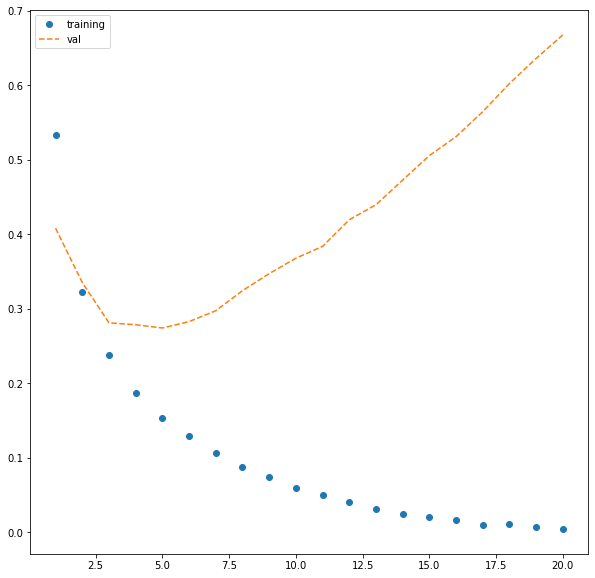

In [14]:
import matplotlib.pyplot as plt 

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

fig = plt.figure(figsize=(10,10))
epoch = range(1,len(loss_values)+1)
plt.plot(epoch,loss_values, 'o',label='training')
plt.plot(epoch,val_loss_values, '--',label='val')
plt.legend()
plt.show()

En la parte de aprendizaje hay una reducción importante pero a la hora de verlo con los valores de validación vemos que no tiene el mismo desempeño, esto invita a pensar que hay un overfiting en la red

Nuevo model con menos neuronas en cada capa 

In [15]:
model2 = models.Sequential()
model2.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
model2.add(layers.Dense(4, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))

model2.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
             metrics=['acc'])

history2 = model2.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 2s 49ms/step - loss: 0.6540 - acc: 0.5983 - val_loss: 0.5797 - val_acc: 0.6868
Epoch 2/20
30/30 [==============================] - 2s 55ms/step - loss: 0.5449 - acc: 0.7618 - val_loss: 0.5307 - val_acc: 0.8236
Epoch 3/20
30/30 [==============================] - 1s 37ms/step - loss: 0.4933 - acc: 0.8372 - val_loss: 0.5018 - val_acc: 0.8224
Epoch 4/20
30/30 [==============================] - 3s 115ms/step - loss: 0.4599 - acc: 0.8722 - val_loss: 0.4813 - val_acc: 0.8689
Epoch 5/20
30/30 [==============================] - 1s 31ms/step - loss: 0.4280 - acc: 0.9000 - val_loss: 0.4671 - val_acc: 0.8743
Epoch 6/20
30/30 [==============================] - 1s 24ms/step - loss: 0.4065 - acc: 0.9175 - val_loss: 0.4711 - val_acc: 0.8405
Epoch 7/20
30/30 [==============================] - 1s 39ms/step - loss: 0.3843 - acc: 0.9321 - val_loss: 0.4800 - val_acc: 0.8282
Epoch 8/20
30/30 [==============================] - 1s 36ms/step - loss: 0.3701 - 

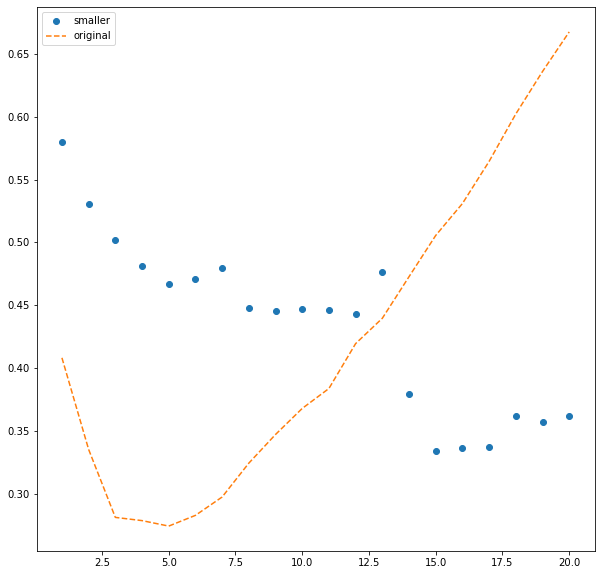

In [16]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

val_loss_values2 = history2.history['val_loss']


fig = plt.figure(figsize=(10,10))
epoch = range(1,len(loss_values)+1)
plt.plot(epoch,val_loss_values2, 'o',label='smaller')
plt.plot(epoch,val_loss_values, '--',label='original')
plt.legend()
plt.show()

### Regularización

In [17]:
from keras import regularizers

In [18]:
model3 = models.Sequential()
model3.add(layers.Dense(16, activation='relu', input_shape=(10000,),kernel_regularizer=regularizers.l2(0.001)))
model3.add(layers.Dense(16, activation='relu',kernel_regularizer=regularizers.l2(0.001)))
model3.add(layers.Dense(1, activation='sigmoid'))

model3.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
             metrics=['acc'])

history3 = model3.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val,y_val))


Epoch 1/20
30/30 [==============================] - 8s 239ms/step - loss: 0.6502 - acc: 0.7022 - val_loss: 0.4499 - val_acc: 0.8705
Epoch 2/20
30/30 [==============================] - 1s 35ms/step - loss: 0.3935 - acc: 0.9010 - val_loss: 0.3631 - val_acc: 0.8867
Epoch 3/20
30/30 [==============================] - 1s 44ms/step - loss: 0.3011 - acc: 0.9216 - val_loss: 0.3452 - val_acc: 0.8840
Epoch 4/20
30/30 [==============================] - 2s 53ms/step - loss: 0.2583 - acc: 0.9351 - val_loss: 0.3642 - val_acc: 0.8717
Epoch 5/20
30/30 [==============================] - 1s 35ms/step - loss: 0.2377 - acc: 0.9396 - val_loss: 0.3329 - val_acc: 0.8862
Epoch 6/20
30/30 [==============================] - 1s 38ms/step - loss: 0.2180 - acc: 0.9479 - val_loss: 0.3453 - val_acc: 0.8840
Epoch 7/20
30/30 [==============================] - 1s 45ms/step - loss: 0.2084 - acc: 0.9506 - val_loss: 0.3441 - val_acc: 0.8823
Epoch 8/20
30/30 [==============================] - 1s 47ms/step - loss: 0.1920 - 

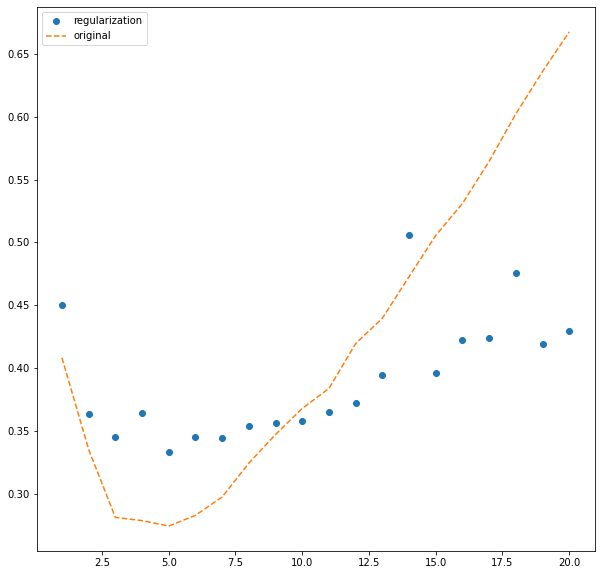

In [19]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

val_loss_values3 = history3.history['val_loss']


fig = plt.figure(figsize=(10,10))
epoch = range(1,len(loss_values)+1)
plt.plot(epoch,val_loss_values3, 'o',label='regularization')
plt.plot(epoch,val_loss_values, '--',label='original')
plt.legend()
plt.show()

### Dropout

In [20]:
model4 = models.Sequential()
model4.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model4.add(layers.Dropout(0.5))
model4.add(layers.Dense(16, activation='relu'))
model4.add(layers.Dropout(0.5))
model4.add(layers.Dense(1, activation='sigmoid'))

model4.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
             metrics=['acc'])

history4 = model4.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 6s 161ms/step - loss: 0.6434 - acc: 0.6253 - val_loss: 0.4719 - val_acc: 0.8571
Epoch 2/20
30/30 [==============================] - 1s 35ms/step - loss: 0.4898 - acc: 0.7916 - val_loss: 0.3744 - val_acc: 0.8719
Epoch 3/20
30/30 [==============================] - 1s 49ms/step - loss: 0.4034 - acc: 0.8394 - val_loss: 0.3180 - val_acc: 0.8850
Epoch 4/20
30/30 [==============================] - 1s 29ms/step - loss: 0.3447 - acc: 0.8724 - val_loss: 0.3019 - val_acc: 0.8805
Epoch 5/20
30/30 [==============================] - 1s 33ms/step - loss: 0.2884 - acc: 0.8977 - val_loss: 0.2766 - val_acc: 0.8910
Epoch 6/20
30/30 [==============================] - 1s 37ms/step - loss: 0.2483 - acc: 0.9141 - val_loss: 0.2791 - val_acc: 0.8890
Epoch 7/20
30/30 [==============================] - 1s 39ms/step - loss: 0.2175 - acc: 0.9290 - val_loss: 0.2826 - val_acc: 0.8898
Epoch 8/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1963 - 

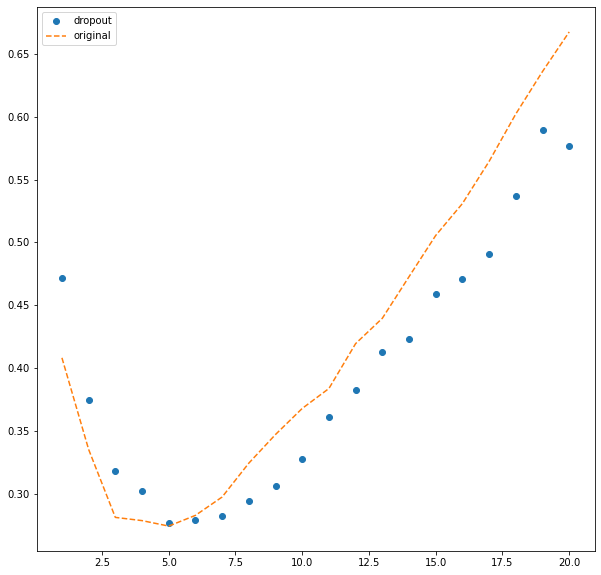

In [21]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

val_loss_values4 = history4.history['val_loss']


fig = plt.figure(figsize=(10,10))
epoch = range(1,len(loss_values)+1)
plt.plot(epoch,val_loss_values4, 'o',label='dropout')
plt.plot(epoch,val_loss_values, '--',label='original')
plt.legend()
plt.show()

### Dropout y reducción de neuronas por capa

In [22]:
model5 = models.Sequential()
model5.add(layers.Dense(6, activation='relu', input_shape=(10000,)))
model5.add(layers.Dropout(0.5))
model5.add(layers.Dense(6, activation='relu'))
model5.add(layers.Dropout(0.5))
model5.add(layers.Dense(1, activation='sigmoid'))

model5.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
             metrics=['acc'])

history5 = model5.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 12s 375ms/step - loss: 0.6806 - acc: 0.5496 - val_loss: 0.6359 - val_acc: 0.8312
Epoch 2/20
30/30 [==============================] - 1s 35ms/step - loss: 0.6341 - acc: 0.6121 - val_loss: 0.5972 - val_acc: 0.8431
Epoch 3/20
30/30 [==============================] - 1s 26ms/step - loss: 0.5946 - acc: 0.6478 - val_loss: 0.5459 - val_acc: 0.8682
Epoch 4/20
30/30 [==============================] - 1s 44ms/step - loss: 0.5587 - acc: 0.6768 - val_loss: 0.4987 - val_acc: 0.8702
Epoch 5/20
30/30 [==============================] - 1s 27ms/step - loss: 0.5294 - acc: 0.7086 - val_loss: 0.4715 - val_acc: 0.8775
Epoch 6/20
30/30 [==============================] - 1s 22ms/step - loss: 0.4979 - acc: 0.7316 - val_loss: 0.4243 - val_acc: 0.8828
Epoch 7/20
30/30 [==============================] - 1s 21ms/step - loss: 0.4801 - acc: 0.7470 - val_loss: 0.4029 - val_acc: 0.8870
Epoch 8/20
30/30 [==============================] - 1s 46ms/step - loss: 0.4556 -

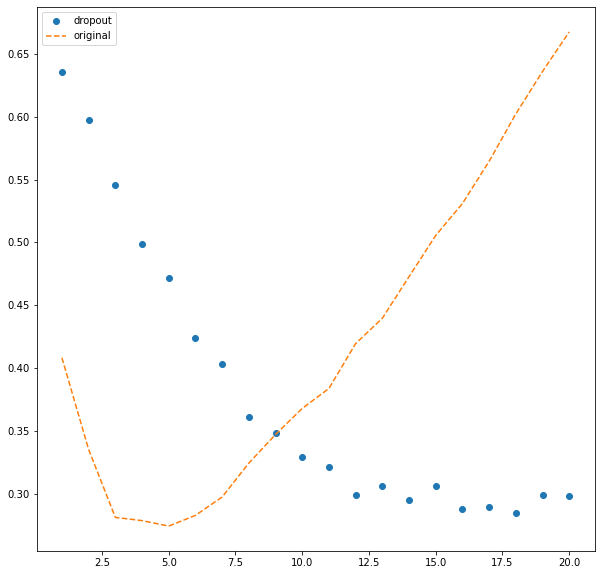

In [23]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

val_loss_values5 = history5.history['val_loss']


fig = plt.figure(figsize=(10,10))
epoch = range(1,len(loss_values)+1)
plt.plot(epoch,val_loss_values5, 'o',label='dropout')
plt.plot(epoch,val_loss_values, '--',label='original')
plt.legend()
plt.show()

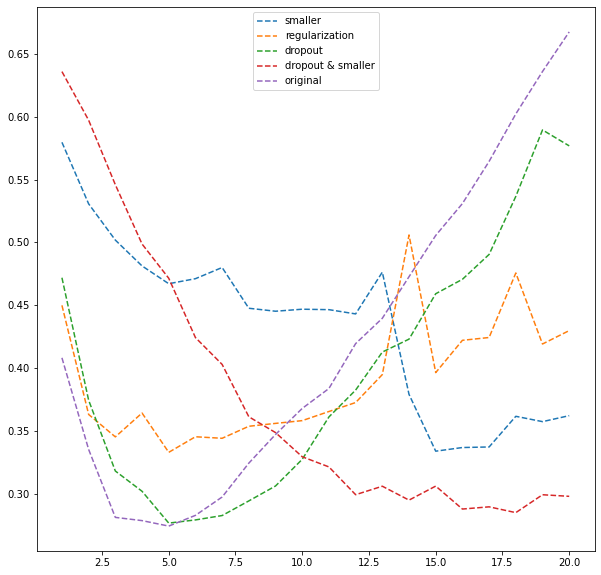

In [24]:
fig = plt.figure(figsize=(10,10))
epoch = range(1,len(loss_values)+1)
plt.plot(epoch,val_loss_values2, '--',label='smaller')
plt.plot(epoch,val_loss_values3, '--',label='regularization')
plt.plot(epoch,val_loss_values4, '--',label='dropout')
plt.plot(epoch,val_loss_values5, '--',label='dropout & smaller')
plt.plot(epoch,val_loss_values, '--',label='original')
plt.legend()
plt.show()

In [25]:
import string 
import numpy as np 

In [91]:
def analyze(text): 
  # Prepare the input by removing punctuation characters, converting characters to lower case, and removing words containing numbers 
  translator = str.maketrans('', '', string.punctuation) 
  text = text.translate(translator) 
  text = text.lower().split(' ') 
  text = [word for word in text if word.isalpha()] 

  text_data = []

  for word in text: 
    if word in words:
      text_data.append(words[word])


  test = vectorizar([text_data])

  # return test.shape

  result = model.predict(test)
  result_text = ""
  if result >= 0.5: 
    result_text = "good review"
  elif result < 0.5: 
    result_text = "bad review"
  return [result, result_text]

In [93]:
[review, text ] = analyze("This is a bad review, terrible, i hate it")
print(review)
print(text)

[[0.13953644]]
bad review
